<a href="https://colab.research.google.com/github/Saetbyeol-Choi/R_Report/blob/main/Module_1_Report_Olympic_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1 Report - Olympic Games**
# Olympic Records research for Sponsor Recommendation
### Name: Saetbyeol Choi

## **1) Objective of the proposed research**

###### The given dataset from kaggle is for athletes who participated in the summer and winter Olympics held between 1896 and 2016. Athletes are listed in 15 columns and each column contains information including missing values. This report aims to increase the accuracy of analysis by excluding missng values.

###### The dataset includes both male and female athletes. The oldest of the athletes appears to be 97 years old and the youngest to be 10 years old. In this report, they are rearranged based on the number of medals won.

###### There are three types of medals, which are gold, siver, and bronze. The focus is on the number of gold medals won and the athlete with the most gold medals will be recommended for sponsorship to Kellogg's.

## **2) Data Exploration**

###### Load dataset using "read.csv()" function and create a data frame named "athlete.df"

In [ ]:
athlete.df <- read.csv("/content/athlete_events.csv")

###### Install "dplyr" which is a package for data manipulation tasks.

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#### 1. Showing the first 10 rows of data frame
###### Rows 1 to 10 are subsetted from the data frame by using indexing operators "[ ]" called "The square brackets".

In [ ]:
athlete.df[1:10,]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
6,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA
8,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NA
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NA


#### 2. Showing the number of rows and columns (in 3 ways)
###### "dim()" is used to set the dimension of the data frame and output both number of rows and columns.<br> The data frame consists of 271,116 rows and 15 columns.

In [ ]:
dim(athlete.df)

[1] 271116     15

###### We can get the number of rows and columns by combining "nrow()", which counts the numebr of rows and "ncol()", which counts the number of columns, with "c()".

In [ ]:
c(nrow(athlete.df),ncol(athlete.df))

[1] 271116     15

###### We can also get the number of rows and columns with "str()" function showing the structure of a data frame.

In [ ]:
str(athlete.df)

'data.frame':	271116 obs. of  15 variables:
 $ ID    : int  1 2 3 4 5 5 5 5 5 5 ...
 $ Name  : chr  "A Dijiang" "A Lamusi" "Gunnar Nielsen Aaby" "Edgar Lindenau Aabye" ...
 $ Sex   : chr  "M" "M" "M" "M" ...
 $ Age   : int  24 23 24 34 21 21 25 25 27 27 ...
 $ Height: int  180 170 NA NA 185 185 185 185 185 185 ...
 $ Weight: num  80 60 NA NA 82 82 82 82 82 82 ...
 $ Team  : chr  "China" "China" "Denmark" "Denmark/Sweden" ...
 $ NOC   : chr  "CHN" "CHN" "DEN" "DEN" ...
 $ Games : chr  "1992 Summer" "2012 Summer" "1920 Summer" "1900 Summer" ...
 $ Year  : int  1992 2012 1920 1900 1988 1988 1992 1992 1994 1994 ...
 $ Season: chr  "Summer" "Summer" "Summer" "Summer" ...
 $ City  : chr  "Barcelona" "London" "Antwerpen" "Paris" ...
 $ Sport : chr  "Basketball" "Judo" "Football" "Tug-Of-War" ...
 $ Event : chr  "Basketball Men's Basketball" "Judo Men's Extra-Lightweight" "Football Men's Football" "Tug-Of-War Men's Tug-Of-War" ...
 $ Medal : chr  NA NA NA "Gold" ...


#### 3. Showing percentiles of the numerical values
###### The "quantile()" function is used to find the percentile and a number between 0 and 1 can be input to the parameter.<br> The central value of "Age" column which has numeric values was obtained, by entering 0.5.<br> With the argument "na.rm=TRUE", missing values can be excluded.

In [ ]:
quantile(athlete.df$Age, 0.5, na.rm=TRUE)

50% 
 24

#### 4. Showing some valuable information
###### The pipe operator, "%>%" is an operator that concatenates commands functions.<br> First, extract the data excluding missing values from the medal column by using "filter()" function used to select specific rows that satisfy a certain condition from a column.<br> Secondly, sort them by gender(which is Sex column) using "group_by" function which groups the data frame by multiple columns.<br> Lastly, the sum of the numbers for each type of medal is calculated by using "count()" function counts number of values.<br> The total of medals by gender and medal type is calculated. From this, it can be confirmed that male athletes won more medals than female athletes for all three types of medals.

In [ ]:
athlete.df %>% filter(is.na(Medal) == FALSE) %>% group_by(Sex) %>% count(Medal)

Sex,Medal,n
<chr>,<chr>,<int>
F,Bronze,3771
F,Gold,3747
F,Silver,3735
M,Bronze,9524
M,Gold,9625
M,Silver,9381


## **3) One column selection**

###### First, to avoid duplicate data, use "distinct()" to remove duplicate rows of a dataframe if they exist. And name this data frame "athlete.df1".

In [ ]:
 athlete.df1 <- distinct(athlete.df)

###### By calling the "tail" function that displays the last n rows together with "sort()" function that sorts the vales in ascending order, 10 largest number of age coulumn is printed.

In [ ]:
tail(sort(athlete.df1$Age),10)

[1] 76 76 77 80 81 81 84 88 96 97

###### For more detail, use "slice_max()" which returns rows with the highest values of the data frame based on a column.<br> If there are data with the same frequency, more rows may appear than the number of rows requested. To ignore ties, use "with_ties" option as "FALSE" and the data of 10 rows can be extracted as requested.<br> The top 10 data extraction from the Age column reveals that the oldest athlete who prticipated in the Olympic was 97 years old John Quincy Adams Ward.

In [ ]:
athlete.df1 %>% slice_max(athlete.df1$Age, n=10, with_ties = FALSE)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
128719,John Quincy Adams Ward,M,97,NA,NA,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NA
49663,Winslow Homer,M,96,NA,NA,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA
31173,Thomas Cowperthwait Eakins,M,88,NA,NA,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA
5146,George Denholm Armour,M,84,NA,NA,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NA
77710,Robert Tait McKenzie,M,81,NA,NA,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NA
118789,Louis Tauzin,M,81,NA,NA,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NA
69729,Max Liebermann,M,80,NA,NA,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",NA
85936,Charles Henry Niehaus,M,77,NA,NA,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NA
28993,Albin Dbrich,M,76,NA,NA,Austria,AUT,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NA


## **4) Series**

###### Extract specific columns from the data frame named "athlete.df' and create a new data frame named "athlete.df2". In this case, 5 columns(ID, Name, Sex, Sport, Medal) are extracted.<br> After that, use "filter()" function to extract the rows corresponding to the "Gold" medal on medal column.<br> Use "group_by()" function to group the data frame by ID, Name, Sex, Sport and Medal columns.<br> Use "count()" function to get the sum of the number of gold medlas awarded by ID. By based on ID column, it prevents errors that may occur, such as when people with the same name are grouped together based on the name.<br>


In [ ]:
athlete.df2 <- athlete.df[c(1,2,3,13,15)] %>% filter(Medal == "Gold") %>% group_by(ID, Name, Sex, Sport, Medal) %>% count(ID)

###### Extract 1~20 rows using the subset funtion, "[]".<br> The output shows that columnn "n" containing the values calculated through "count()" function along with 20 rows and 5 columns extracted from the data frame. The column "n" appended to the end represents the number of gold medals.

In [ ]:
athlete.df2[1:20,]

ID,Name,Sex,Sport,Medal,n
<int>,<chr>,<chr>,<chr>,<chr>,<int>
4,Edgar Lindenau Aabye,M,Tug-Of-War,Gold,1
17,Paavo Johannes Aaltonen,M,Gymnastics,Gold,3
20,Kjetil Andr Aamodt,M,Alpine Skiing,Gold,4
21,Ragnhild Margrethe Aamodt,F,Handball,Gold,1
40,Roald Edgar Aas,M,Speed Skating,Gold,1
42,Thomas Valentin Aas,M,Sailing,Gold,1
56,Ren Abadie,M,Cycling,Gold,1
72,Aleksey Aleksandrovich Abalmasov,M,Canoeing,Gold,1
73,Luc Abalo,M,Handball,Gold,2


###### Since "arrange()" function, which sorts the rows of data frame, defaults to ascending order, use "desc()" together to sort the n column in descending order.<br> The function "head()" returns the first n rows of data frame. By putting 10, the top 10 rows from the data frame are extracted.

In [ ]:
athlete.df3 <- head(arrange(athlete.df2,desc(n)),10)

###### The output of data frame called "athlete.df3" is shown as follows.<br> The results of the data frame shows that the athlete located in the first row has the largest number in n column with 23 gold medals. And each of the other columns shows that the athlete is a male swimmer with ID number 94406 and his name is Michael Fred Phelps, II.

In [ ]:
athlete.df3
str(athlete.df3)

ID,Name,Sex,Sport,Medal,n
<int>,<chr>,<chr>,<chr>,<chr>,<int>
94406,"Michael Fred Phelps, II",M,Swimming,Gold,23
33557,"Raymond Clarence ""Ray"" Ewry",M,Athletics,Gold,10
67046,Larysa Semenivna Latynina (Diriy-),F,Gymnastics,Gold,9
69210,"Frederick Carlton ""Carl"" Lewis",M,Athletics,Gold,9
87390,Paavo Johannes Nurmi,M,Athletics,Gold,9
113912,Mark Andrew Spitz,M,Swimming,Gold,9
11642,"Matthew Nicholas ""Matt"" Biondi",M,Swimming,Gold,8
11951,Ole Einar Bjrndalen,M,Biathlon,Gold,8
13029,Usain St. Leo Bolt,M,Athletics,Gold,8


grouped_df [10 × 6] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ ID   : int [1:10] 94406 33557 67046 69210 87390 113912 11642 11951 13029 35550
 $ Name : chr [1:10] "Michael Fred Phelps, II" "Raymond Clarence \"Ray\" Ewry" "Larysa Semenivna Latynina (Diriy-)" "Frederick Carlton \"Carl\" Lewis" ...
 $ Sex  : chr [1:10] "M" "M" "F" "M" ...
 $ Sport: chr [1:10] "Swimming" "Athletics" "Gymnastics" "Athletics" ...
 $ Medal: chr [1:10] "Gold" "Gold" "Gold" "Gold" ...
 $ n    : int [1:10] 23 10 9 9 9 9 8 8 8 8
 - attr(*, "groups")= tibble [10 × 6] (S3: tbl_df/tbl/data.frame)
  ..$ ID   : int [1:10] 11642 11951 13029 33557 35550 67046 69210 87390 94406 113912
  ..$ Name : chr [1:10] "Matthew Nicholas \"Matt\" Biondi" "Ole Einar Bjrndalen" "Usain St. Leo Bolt" "Raymond Clarence \"Ray\" Ewry" ...
  ..$ Sex  : chr [1:10] "M" "M" "M" "M" ...
  ..$ Sport: chr [1:10] "Swimming" "Biathlon" "Athletics" "Athletics" ...
  ..$ Medal: chr [1:10] "Gold" "Gold" "Gold" "Gold" ...
  ..$ .rows: list<int> [1:10] 


## **5) Plot**

###### To increase visibility, "barplot()" function was used to create a bar graph. The "barplot()" represents categorical data as rectangular bars with height and length of data values.<br> Set the ID column and n column extracted from the data frame called "athlete.df3" as the x-axis and the y-axis respectively. The title of the graph and the name of x-axis and y-axis can be specified using "main=, xlab=, ylab=". The bar graph set in purple with "col=" expresses the number of gold medals by ID. Also, the font size is specified with "cex.lab=", and the plot character can be selected with the "pch=" argument by putting values from 0 to 25.<br> The bar graph shows that ID 94406 has the highest number of gold medals, and the result is the same as the result of the data frame "athlete.df3". Bar graphs allow you to compare and visually check specific values in data frames.

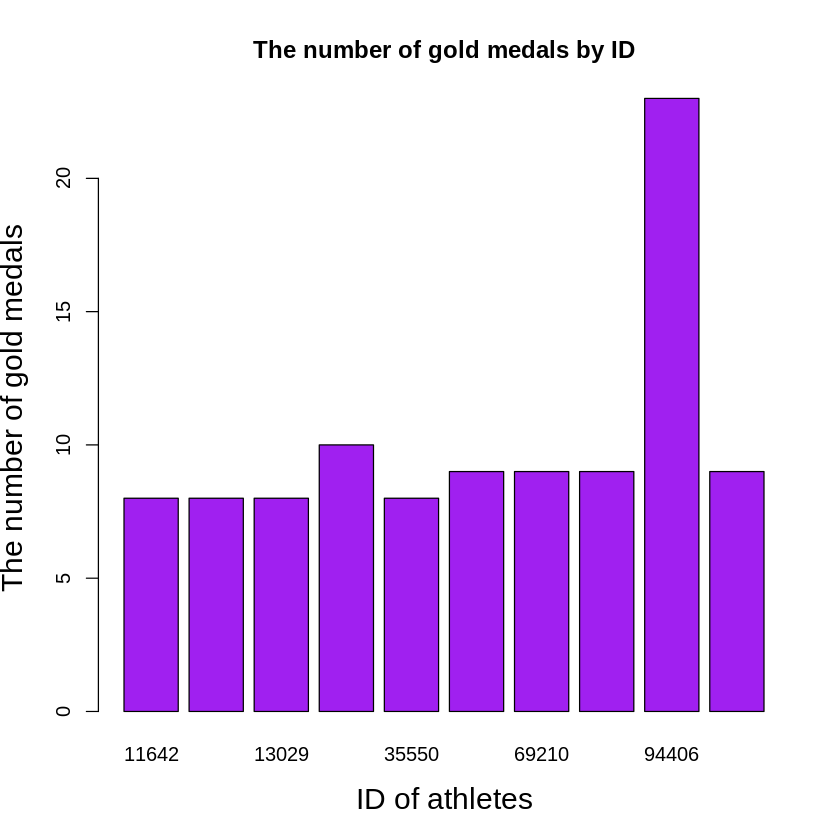

In [ ]:
barplot(n~ID, data = athlete.df3,main= "The number of gold medals by ID", col="purple", xlab="ID of athletes", ylab="The number of gold medals", cex.lab="1.5", pch=1)

## **6) Summary**

###### It is possible to read excel files containing a large amount of data to data frame and analyze. 

###### The number of medals by gender was checked. Female athletes had the largest number of bronze medals with 3,771, while male had the largest number of gold medals with 9,625. Sorting age in descending order revealed that the oldest of the Olympic athlete was 97 years old. Other columns identify the oldest athlete as a man named John Quincy Adams Ward, who competed in the art competitions as team United States at the 1928 summer Olympic in Amsterdam.

###### The purpose of the research is to list the athletes by the number of gold medals calculated from the Olympic athlete records and to recommend the athlete who has won the most medals. For effective analysis, 5 essential columns that meet the purpose of the analysis were extracted, and theses are ID, Name, Sex, Sport columns that enable athletes to be identified and Medal column to be an important factor in recommendation. Only data corresponding to gold medals were extracted from the medal column, and the number of gold medals by ID could be calculated. The purpose of classifying by ID is to prevent the occurrence of duplicate values that may occur due to the existence of a person with the same name in the existing data file.

###### The athlete who won the most gold medals is Michael Fred Phelps, II	with ID 94406. This results can be visually confirmed with the data frame "athlete.df3" and the bar graph.

## **7) Recommendations**

###### The biggest factor in sponsoring an Olympic athlete can be judging the athlete's ability. Athlete's ability can be quantified by the number of medals won. Among them, the individual ability of the athletes who participated in the Olympics can be evaluated based on the number of gold medals awarded to the athlete who first placed in the event.
###### Michael Fred Phelps, II in swimming had the highest number of gold medals, and the number was overwhelming compared to other athletes. For this reason, I would like to recommend Michael Fred Phelps, II to Kellog's to sponsor.